In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IMDB-Movie-Data.csv')

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
df.shape

(1000, 12)

In [4]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [7]:
df['Title'][df['Runtime (Minutes)']>=180]

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [8]:
df.groupby('Year')['Votes'].mean().sort_values(ascending=False).head(1)

Year
2012    290861.483871
Name: Votes, dtype: float64

<Axes: xlabel='Year', ylabel='Votes'>

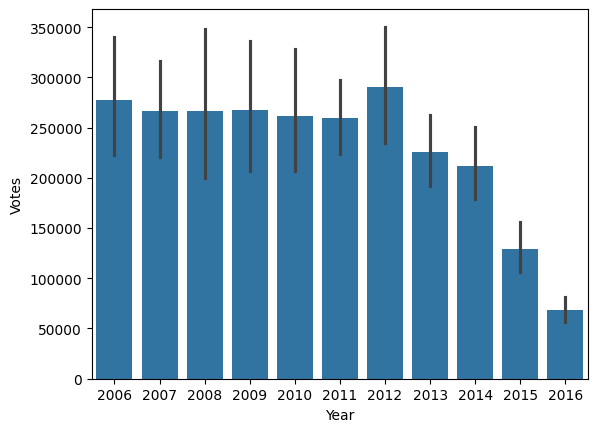

In [9]:
sns.barplot(x='Year',y='Votes',data=df)

In [10]:
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False).head(1)

Year
2009    115.742
Name: Revenue (Millions), dtype: float64

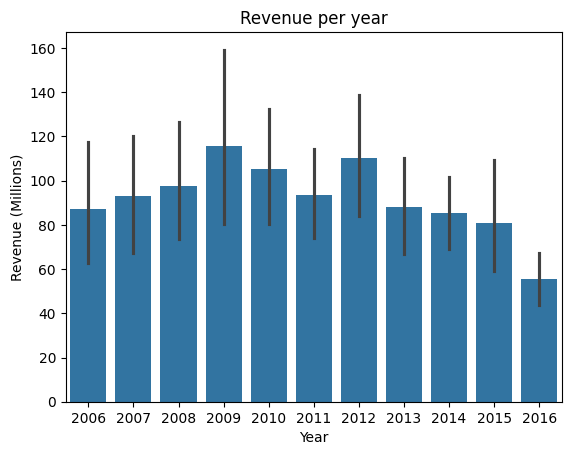

In [11]:
sns.barplot(x='Year',y='Revenue (Millions)',data=df)
plt.title('Revenue per year')
plt.show()

In [12]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

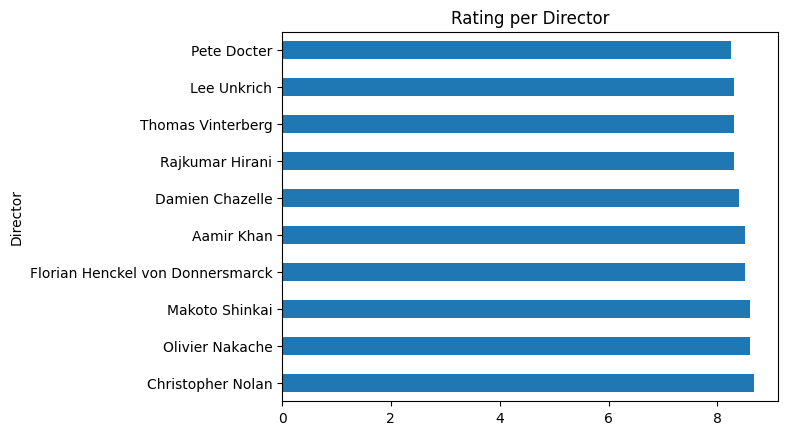

In [13]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Rating per Director')
plt.show()

In [14]:
df['Year'].value_counts().head(10)

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
Name: count, dtype: int64

In [15]:
df['Title'][df['Revenue (Millions)']==df['Revenue (Millions)'].max()]

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [16]:
df.nlargest(10,'Rating')[['Title','Rating']]

,Title,Rating
54,The Dark Knight,9.0
80,Inception,8.8
36,Interstellar,8.6
96,Kimi no na wa,8.6
249,The Intouchables,8.6
64,The Prestige,8.5
99,The Departed,8.5
124,The Dark Knight Rises,8.5
133,Whiplash,8.5
476,The Lives of Others,8.5


<Axes: ylabel='Title'>

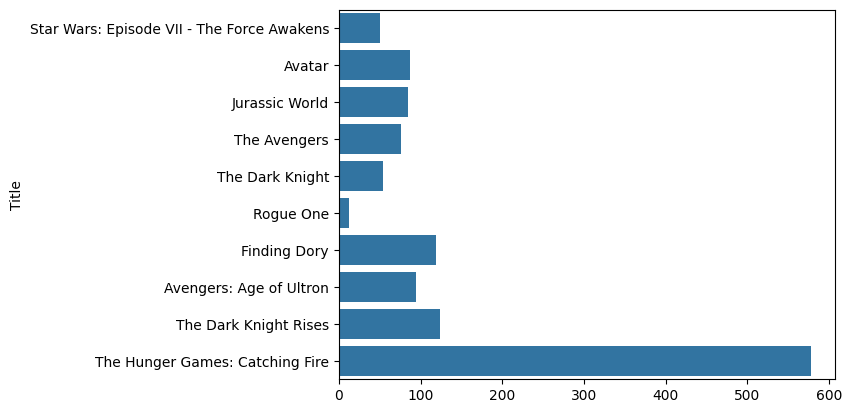

In [17]:
sns.barplot(data = df.nlargest(10,'Revenue (Millions)')['Title'])

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

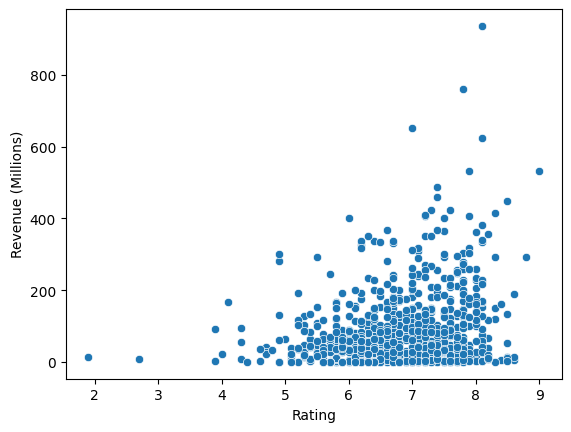

In [18]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=df)

In [19]:
def Rating(x):
    if x>=7.0:
        return 'Excellent'
    elif x>=6.0:
        return 'Good'
    else :
        return 'Average'

In [20]:
df['Rating_category'] = df['Rating'].apply(Rating)

df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Good
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Excellent
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Excellent
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Excellent
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,Excellent


In [32]:
df['Genre'].str.contains('Action',case=False).sum()

277

In [35]:
list = []
for item in df['Genre']:
    list.append(item.split(','))

onedlist = []
for row in list:
    for item in row:
        onedlist.append(item)

uniqueList = []
for item in onedlist:
    if item not in uniqueList:
        uniqueList.append(item)

uniqueList

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

In [36]:
from collections import Counter

Counter(onedlist)

Counter({'Drama': 419,
         'Action': 277,
         'Comedy': 250,
         'Adventure': 244,
         'Thriller': 148,
         'Crime': 126,
         'Romance': 120,
         'Sci-Fi': 107,
         'Fantasy': 92,
         'Horror': 87,
         'Mystery': 86,
         'Biography': 67,
         'Family': 48,
         'Animation': 45,
         'History': 25,
         'Music': 15,
         'Sport': 15,
         'War': 10,
         'Musical': 5,
         'Western': 4})